# Difference of Gaussians (DoG)
***

In [86]:
# notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## 1D DoG
***

In [103]:
# creating 1D gaussian function
def gauss_1d(x_range, mean, sigma):
    x = np.arange(-x_range, x_range, .01)
    variance = np.square(sigma)
    gauss_dist = np.exp(-np.square(x-mean)/(2*sigma))/(np.sqrt(2*np.pi*variance))
    return gauss_dist

In [104]:
res = gauss_1d(5, 0, 1)
res2 = gauss_1d(5, 0, 5)
print(res.max(), res2.max())

0.3989422804014327 0.07978845608028654


In [105]:
def DoG_1d(x_range, mean, sigma1, sigma2):
    if sigma1 > sigma2:
        return gauss_1d(x_range, mean, sigma1) - gauss_1d(x_range, mean, sigma2)
    return gauss_1d(x_range, mean, sigma2) - gauss_1d(x_range, mean, sigma1)

In [111]:
def plot_gauss_1d(points):
    x_range = len(points) * 0.01/2
    x = np.arange(-x_range, x_range, .01)
    plt.plot(x, points)
    plt.show()

In [113]:
combined = DoG_1d(5, 0, 1, 2)

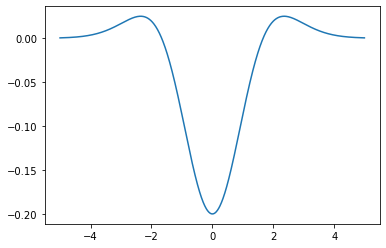

In [114]:
plot_gauss_1d(combined)

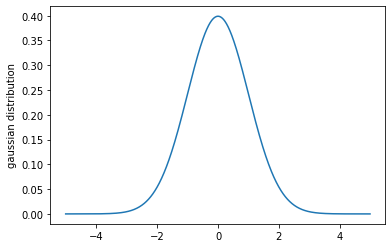

In [106]:
# testing sample 1D gauss
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5, 5 ,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

## 2D DoG
***

In [81]:
# x, y are ranges
def gauss_2d(x, y, mean, sigma):
    x, y = np.mgrid[-x:x:.01, -y:y:.01]
    x = np.square(x - mean)
    y = np.square(y - mean)
    variance = np.square(sigma)
    gauss_vals = np.exp(-(x + y)/(2 * variance)) / (2 * np.pi * variance)
    return gauss_vals

In [102]:
gaussian2d = gauss_2d(5, 5, 0, 1)

In [83]:
def DoG_2d(x, y, mean, sigma1, sigma2):
    if sigma1 > sigma2:
        return gauss_2d(x, y, mean, sigma1) - gauss_1d(x, y, mean, sigma2)
    return gauss_2d(x, y, mean, sigma2) - gauss_2d(x, y, mean, sigma1)

In [99]:
def plot_gauss_2d(points, angle1=30, angle2=30):
    xv, yv = np.mgrid[0:len(points), 0:len(points[0])]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    dem3d=ax.plot_surface(xv,yv,points, cmap='winter', edgecolor='none')
    ax.view_init(angle1, angle2)
    plt.show()

In [90]:
combined_gauss2d = DoG_2d(5, 5, 0, 1, 2)

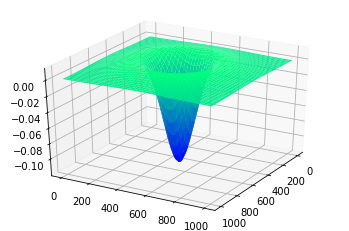

In [100]:
plot_gauss_2d(combined_gauss2d)

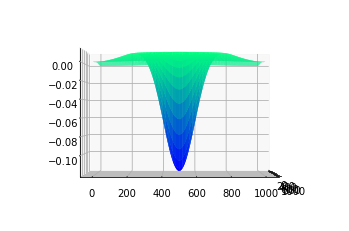

In [101]:
plot_gauss_2d(combined_gauss2d, 0, 0)